### 웹 사이트와 크롤링

웹 페이지의 기본 기술을 익혔다면 이제 웹 크롤링 기술로 들어가보자.  
웹 사이트 내에 있는 정보를 추출하는 행위를 웹 크롤링이라고 부른다.  
웹 크롤링은 인터넷 콘텐츠를 색인화하는 과정을 의미하는데  
특정한 웹 사이트에 접속해서 원하는 정보를 추출하고 이를 바탕으로 분석할 데이타를 확보할 수 있다.  

우리가 앞으로 하게 될 웹 크롤링은 크게 두 가지 단계를 거친다.  

1.	원하는 웹 페이지의 html문서를 싹 긁어온다.  - requests
2.	html 문서에서 원하는 것을 골라서 정보를 추출한다.  - Beautiful Soup


### 사이트 정보 가져오기 - requests

* import requests 로 requests 라이브러리를 불러온다
* requests.get() 함수로 원하는 사이트에 접속한다.

In [6]:
import requests

requests.get('http://www.google.com/')

# <Response [200]>은 요청이 정상적이라는 것이다. 안의 숫자가 다른 것이 나온다면 잘못된 요청인 것이다.

<Response [200]>

In [9]:
response = requests.get('http://www.google.com/')
response.text[0 : 100]

# 위를 통해 google페이지의 html문서를 끌어올 수 있다.

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content'

### 사이트 정보 추출하기 - Beautiful Soup

앞에서 HTML 코드를 받아왔다.  
이제 HTML 코드 구문을 요소별로 구분하고 처리해야 하는데, 이런 작업을 파싱(parsing)이라 한다.  
request.text를 이용해 가져온 텍스트형태의 html 데이타를 손쉽게 파싱할 수 있도록 해주는 라이브러리가  
바로 Beautiful Soup이다.

In [10]:
from bs4 import BeautifulSoup

<!DOCTYPE html>
<html data-dark="false" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <title>
   NAVER
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=1190" name="viewport"/>
  <meta content="NAVER" name="apple-mobile-web-app-title">
   <meta content="index,nofollow" name="robots">
    <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
     <meta content="네이버" property="og:title"/>
     <meta content="https://www.naver.com/" property="og:url"/>
     <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
     <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
      <meta content="summary" name="twitter:card"/>
      <meta content="" name="twitter:title"/>
      <meta content="https://www.naver.com/" name="twitter:url"/>
      <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/
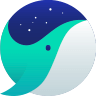
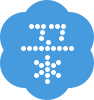

In [18]:
url = 'http://www.naver.com'

response = requests.get(url)


if response.status_code == 200:
    #응답받은 text를 html로 파싱
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    print(soup.prettify())
else :
    print("잘모옷된 요청")

In [20]:
url = 'http://www.google.com'
response = requests.get(url)

#  raise_for_status() : 위 if else문처럼 잘못된 주소라면 판별해준다.
response.raise_for_status()


print('문제가 없으면 이 부분 출력됩니다.', len(response.text))

#파일 만들기
with open('mypage.html','w', encoding = 'utf-8') as f:
    f.write(response.text)

문제가 없으면 이 부분 출력됩니다. 15263


`위 결과를 보면 Beautiful Soup 라이브러리를 통해 HTML 구조를 갖는 파일이 잘 파싱된 것을 확인할 수 있다  
 이제 파싱한 결과에서 Beautiful Soup의 find() 함수를 이용해서 우리가 원하는 태그의 내용을 추출해보자
`

In [51]:
html = """
    <html><body><div id = 'wrap'>
    <ul><li><a href = 'http://www.naver.com'>NAVER</a></li>
    <li><a href = 'http://www.daum.net'>DAUM</a></li>
    <li><a href = 'http://www.google.com' id = 'final'>GOOGLE</a></li></ul>
    </div></body></html>
"""

soup = BeautifulSoup(html, 'html.parser')

print(soup.prettify())

<html>
 <body>
  <div id="wrap">
   <ul>
    <li>
     <a href="http://www.naver.com">
      NAVER
     </a>
    </li>
    <li>
     <a href="http://www.daum.net">
      DAUM
     </a>
    </li>
    <li>
     <a href="http://www.google.com" id="final">
      GOOGLE
     </a>
    </li>
   </ul>
  </div>
 </body>
</html>



### find, find_all

In [52]:
# html 코드 안에서 가장 앞의 a태그를 찾아서 반환
#a 첫 번째 요소를 찾아서 반환
soup.find('a')

<a href="http://www.naver.com">NAVER</a>

In [53]:
# 태그 안의 content가 반환된다.
soup.find('a').get_text()

'NAVER'

In [54]:
# 위와 마찬가지
soup.find('a').text

'NAVER'

In [55]:
# html 코드 안에서 a태그 전체를 찾아서 반환
names = soup.find_all('a')
for i in names:
    print(i.text)

NAVER
DAUM
GOOGLE


In [56]:
# GOO로 시작하는 사이트를 리턴받아서 출력
names = soup.find_all('a')
for i in names:
#     if 'GOO' in i.text:
#         print(i.text)
    if i.get_text().startswith('GOO'):
        print(i.text)

GOOGLE


In [57]:
#태그의 속성을 찾는 방법
# a태그 중 id의 속성값이 final인 것을 찾는다.
name = soup.find('a', attrs = {'id' : 'final'})

name

<a href="http://www.google.com" id="final">GOOGLE</a>

### copy selector를 사용한 select_one, select

In [74]:
url = 'https://kin.naver.com/search/list.naver?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC'

response = requests.get(url)

if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    title = soup.select_one( '#s_content > div.section > ul > li:nth-child(1) > dl > dt > a')
    print(title)
    print('=======================================================')
    a = title.find('b').text
    print(a)
    
else :
    print(response.status_code)

<a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/detail.naver?d1id=1&amp;dirId=10402&amp;docId=415196095&amp;qb=7YyM7J207I2s&amp;enc=utf8§ion=kin&amp;rank=1&amp;search_sort=0&amp;spq=0" target="_blank"><b>파이썬</b> 저장</a>
파이썬


In [101]:
# url = 'https://kin.naver.com/search/list.naver?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC'

# response = requests.get(url)

# if response.status_code == 200:
#     html = response.text
#     soup = BeautifulSoup(html, 'html.parser')
#     result01 = soup.find('dt', class_ = '_nclicks:kin.txt _searchListTitleAnchor')
#     result02 = result01.find('b')
#     print(result02.text.strip())
    
# else :
#     print(response.status_code)

In [104]:
titles = soup.select('dt>a')
for i in titles:
    print(i.text)

파이썬 저장
파이썬 알려주실 분있나요?
파이썬 질문
파이썬머신러닝 공부가 필요합니다.
파이썬 셀레니움
파이썬이나 C언어 배우는 방법
파이썬에서는 i = 3 이런 게 에러가 나나요?
파이썬 csv파일 불러오기
파이썬은 자료형 어떻게 표현하나요?
파이썬 줄바꿈


In [82]:
title = soup.find_all('dt')
titles2 = []

for ti in title:
    title2.append(ti.find('a').text)
print(title2)

NameError: name 'title2' is not defined

In [88]:
title3 = soup.select('li>dl>dt>a')
for title in titles:
    print(title.text)

파이썬 저장
파이썬 알려주실 분있나요?
파이썬 질문
파이썬머신러닝 공부가 필요합니다.
파이썬 셀레니움
파이썬이나 C언어 배우는 방법
파이썬에서는 i = 3 이런 게 에러가 나나요?
파이썬 csv파일 불러오기
파이썬은 자료형 어떻게 표현하나요?
파이썬 줄바꿈
